In [1]:
# ALL THANKS AND GLORY TO THE AND my ONLY GOD AND LORD JESUS CHRIST ALONE


In [137]:
#BY GOD'S GRACE ALONE, declaring  imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier


In [138]:
# BY GOD'S GRACE ALONE
!pip install ahrs

In [139]:
#BY GOD'S GRACE ALONE
df = pd.read_csv("datasets/GTLJC_data2.csv", delimiter=",")

In [143]:
#BY GOD'S GRACE ALONE
# Correcting the axes along which the sensor readings were taken
df["acc_x_corrected"] = -df["acc_y"]
df["acc_y_corrected"] = df["acc_x"]
df["acc_z_corrected"] = df["acc_z"]

df["rot_x_corrected"] = -df["rot_y"]
df["rot_y_corrected"] = df["rot_x"]
df["rot_z_corrected"] = df["rot_z"]

df.drop(columns=["acc_x","acc_y","acc_z","rot_x","rot_y","rot_z"],inplace=True)

In [144]:
df.head()

,batch,GPS_calc_speed,timestamp,latitude,longitude,accuracy,date_time,anomaly,speed_level,acc_x_corrected,acc_y_corrected,acc_z_corrected,rot_x_corrected,rot_y_corrected,rot_z_corrected
0,1,0.0,1,0.0,0.0,2.94,07/06/2025 15:12:50:3.117733,smooth,AVERAGE,0.50,0.36,10.57,-0.01,0.03,-0.02
1,1,0.0,2,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE,0.34,1.59,12.11,-0.12,0.06,-0.02
2,1,0.0,3,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE,-0.46,1.58,9.57,-0.07,-0.01,0.01
3,1,0.0,4,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE,0.96,1.87,10.04,0.01,0.04,0.01
4,1,0.0,5,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE,0.09,2.37,8.40,0.03,0.03,0.01


In [145]:
df.shape

(36388, 15)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36388 entries, 0 to 36387
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batch            36388 non-null  int64  
 1   GPS_calc_speed   36388 non-null  float64
 2   timestamp        36388 non-null  int64  
 3   latitude         36388 non-null  float64
 4   longitude        36388 non-null  float64
 5   accuracy         36388 non-null  float64
 6   date_time        36388 non-null  object 
 7   anomaly          36388 non-null  object 
 8   speed_level      36388 non-null  object 
 9   acc_x_corrected  36388 non-null  float64
 10  acc_y_corrected  36388 non-null  float64
 11  acc_z_corrected  36388 non-null  float64
 12  rot_x_corrected  36388 non-null  float64
 13  rot_y_corrected  36388 non-null  float64
 14  rot_z_corrected  36388 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 4.2+ MB


In [147]:
df["timestamp"] = df["timestamp"] * 24

In [148]:
df.head()

,batch,GPS_calc_speed,timestamp,latitude,longitude,accuracy,date_time,anomaly,speed_level,acc_x_corrected,acc_y_corrected,acc_z_corrected,rot_x_corrected,rot_y_corrected,rot_z_corrected
0,1,0.0,24,0.0,0.0,2.94,07/06/2025 15:12:50:3.117733,smooth,AVERAGE,0.50,0.36,10.57,-0.01,0.03,-0.02
1,1,0.0,48,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE,0.34,1.59,12.11,-0.12,0.06,-0.02
2,1,0.0,72,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE,-0.46,1.58,9.57,-0.07,-0.01,0.01
3,1,0.0,96,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE,0.96,1.87,10.04,0.01,0.04,0.01
4,1,0.0,120,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE,0.09,2.37,8.40,0.03,0.03,0.01


In [149]:
df["anomaly"].value_counts(normalize=True)

anomaly
smooth            0.385045
bump              0.251264
road-patch        0.202210
crack             0.079229
pothole_severe    0.051803
pothole_mild      0.017478
walking           0.012971
Name: proportion, dtype: float64

In [150]:
# BY GOD'S GRACE ALONE
df["anomaly"] = df["anomaly"].str.replace("walking", "static-vibration")


In [151]:
GTLJC_anomaly_distribution_overall = pd.Series(df["anomaly"].value_counts(normalize=True))

<Axes: xlabel='anomaly'>

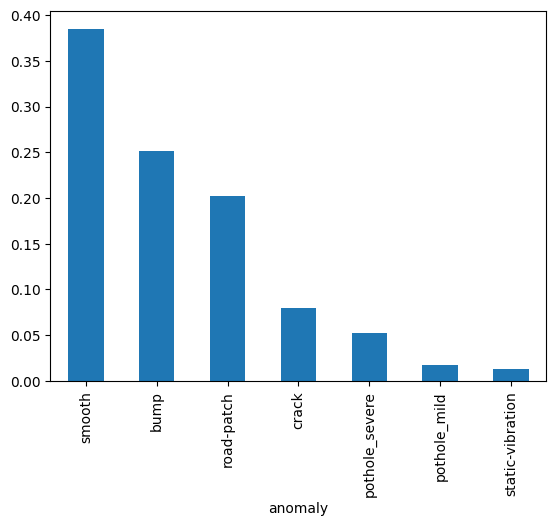

In [152]:
GTLJC_anomaly_distribution_overall.plot(kind = "bar")

In [153]:
# BY GOD'S GRACE ALONE
# Graciously  slicing data into unique anomaly  types
mask_no_movement = df["anomaly"] == "no-movement"
mask_static_vibration = df["anomaly"] == "static-vibration"
mask_smooth = df["anomaly"] == "smooth"
mask_crack = df["anomaly"] == "crack"
mask_bump = df["anomaly"] == "bump"
mask_road_patch = df["anomaly"] == "road-patch"
mask_pothole_mild = df["anomaly"] == "pothole_mild"
mask_pothole_severe = df["anomaly"] == "pothole_severe"


df_smooth = df[mask_smooth]
df_no_movement = df[mask_no_movement] 
df_static_vibration = df[mask_static_vibration]
df_smooth = df[mask_smooth]
df_crack = df[mask_crack]
df_bump = df[mask_bump]
df_road_patch = df[mask_road_patch]
df_pothole_mild = df[mask_pothole_mild]
df_pothole_severe = df[mask_pothole_severe]





In [154]:
# BY GOD'S GRACE ALONE
df_smooth["batch"].value_counts().count


<bound method Series.count of batch
9      300
30     300
38     200
55     200
39     200
      ... 
135    100
134    100
133    100
1       99
86      91
Name: count, Length: 120, dtype: int64>

In [155]:
# BY GOD'S GRACE ALONE
df_no_movement["batch"].value_counts().count


<bound method Series.count of Series([], Name: count, dtype: int64)>

In [156]:
#BY GOD'S GRACE ALONE

df_static_vibration["batch"].value_counts().count




<bound method Series.count of batch
16    100
23    100
26    100
15    100
11     72
Name: count, dtype: int64>

In [17]:
#BY GOD'S GRACE ALONE
df_crack["batch"].value_counts()


batch
4      100
130    100
251    100
249    100
248    100
247    100
246    100
245    100
243    100
242    100
241    100
237    100
236    100
235    100
124    100
12     100
123    100
111    100
110    100
109    100
108    100
105    100
99     100
97     100
74     100
73     100
3      100
58     100
100     83
Name: count, dtype: int64

In [18]:
# BY GOD'S GRACE ALONE
df_bump["batch"].value_counts().count


<bound method Series.count of batch
24    200
61    200
52    200
54    200
22    200
     ... 
28    100
0      99
58     38
49     22
86      9
Name: count, Length: 83, dtype: int64>

In [22]:
#BY GOD'S GRACE ALONE
def fix_batches(df_anomaly_type,batch_col = 'batch', expected_size = 100):
    new_rows = [] # Graciously to be used to store all the fixed-size rows to be elicited
    
    #Graciously regrouping rows in df_anomaly_type by common batch ids
    for batch_id, group in df_anomaly_type.groupby(batch_col):
        group = group.reset_index(drop=True)

        #If group size <= expected size, keep as is
        if len(group) <= expected_size:
            new_rows.append(group)
        else:
            #Graciously splitting the group into chunks of size
            for i in range(0,len(group),expected_size):
                chunk = group.iloc[i:i+expected_size].copy()
                #Graciously assigning a new unique batch name to new chunk
                chunk[batch_col] = f"{batch_id}_{i//expected_size}"
                new_rows.append(chunk)

        
    # Graciously concantenating all chunks back together
    fixed_df = pd.concat(new_rows, ignore_index=True)
    return fixed_df

    



In [23]:
# BY GOD'S GRACE ALONE
# Usage of above routine

df_no_movement_reorganized = not df_no_movement.empty and fix_batches(df_no_movement, batch_col="batch", expected_size=100)
df_static_vibration_reorganized = not df_static_vibration.empty and fix_batches(df_static_vibration, batch_col="batch", expected_size=100)

df_smooth_reorganized = not df_smooth.empty and fix_batches(df_smooth, batch_col="batch", expected_size=100)
df_crack_reorganized = not df_crack.empty and fix_batches(df_crack, batch_col="batch", expected_size=100)

df_bump_reorganized = not df_bump.empty and  fix_batches(df_bump, batch_col="batch", expected_size=100)
df_road_patch_reorganized = not df_road_patch.empty and fix_batches(df_road_patch, batch_col="batch", expected_size=100)

df_pothole_mild_reorganized = not df_pothole_mild.empty and fix_batches(df_pothole_mild, batch_col="batch", expected_size=100)
df_pothole_severe_reorganized = not df_pothole_severe.empty and fix_batches(df_pothole_severe, batch_col="batch", expected_size=100)


In [26]:
#BY GOD'S GRACE ALONE
if isinstance(df_no_movement_reorganized,bool):
    print('Graciously Empty DataFrame')
else:
    df_no_movement_reorganized["batch"].value_counts().count

Graciously Empty DataFrame


In [ ]:
# BY GOD'S GRACE ALONE
#Feature Engineering utility

from scipy.fft import rfft,rfftfreq
from scipy.stats import entropy, kurtosis, skew


def extract_features_from_batch(batch_df, sampling_rate = 100):
    features = {}
    signal_cols = ["acc_x","acc_y","acc_z","rot_x","rot_y","rot_z"]

    for col in signal_cols:
        signal = batch_df[col].values

        # Extracting time domain features
        features[f"{col}_mean"] = np.mean(signal)
        features[f"{col}_std"] = np.std(signal)
        features[f"{col}_min"] = np.min(signal)
        features[f"{col}_max"] = np.max(signal)
        features[f"{col}_range"] = np.ptp(signal)
        features[f"{col}_rms"] = np.sqrt(signal).apply(lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan)
        features[f"{col}_skew"] = skew(signal)
        features[f"{col}_kurt"] = kurtosis(signal)
        features[f"{col}_zero_cross"] = ((signal[:-1] * signal[1:]) < 0).sum()

        #Extracting frequency domain features
        fft_vals = np.abs(rfft(signal))  #Real-valued Fourier Transforms in signal up to around the Nyquist frequency
        freqs = rfftfreq(len(signal), 1/sampling_rate)  #corresponding discrete frequency indices/samples up to around the Nyquist frequency

        fft_power = np.square(fft_vals)
        power_sum = np.sum(fft_power)
        norm_power = fft_power / power_sum if power_sum > 0 else fft_power

        features[f"{col}_fft_entropy"] = entropy(norm_power)

        #Graciously obtaining dominant frequency (index)
        dominant_idx = np.argmax(fft_power)
        features[f"{col}_dominant_freq"] = freqs[dominant_idx]

        #Graciously obtaining Band Energy ratios (Frequency Domain)
        low_band = fft_power[freqs < 5].sum()
        mid_band = fft_power[(freqs >= 5) & (freqs < 15)].sum()
        high_band = fft_power[freqs >= 15].sum()
        features[f"{col}_low_mid_band_ratio"] = low_band / (mid_band + 1e-16) # The exponent prevents a division-by-zero error
        features[f"{col}_high_mid_band_ratio"] = high_band / (mid_band + 1e-16) # The exponent prevents a division-by-zero error

    return features     





# BY GOD'S GRACE ALONE,
Graciously Recall: Higher sampling rate (even above the no of samples),  results in finer sampling, but may cause unintended interpolations not present in original data, begin confidently at the samplng_rate_per_batch equals len/no of samples

In [75]:
# BY GOD'S GRACE ALONE, Graciousy creating a routine  to extract features from all batches of same anomaly type

def apply_feature_extraction_across_all_same_anomaly_batches(entire_df):
    features_list = []
    for batch_id, group in entire_df.groupby("batch"):
        sampling_rate_per_batch = len(group)
        feats = extract_features_from_batch(group, sampling_rate=sampling_rate_per_batch)
        feats["batch"] = batch_id
        feats["label"] = group["anomaly"].iloc[0] # The label heading could be Graciously replaced with 'target'
        features_list.append(feats)

    df = pd.DataFrame(features_list)
    for axis in ["acc_x", "acc_y", "acc_z","rot_x","rot_y","rot_z"]:
        col = f"{axis}_rms"
        df[f"{col}_avg"] = df[col].apply(
            lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan
        )

        df.drop(columns=col,inplace=True)
    
    return df


In [128]:
# BY GOD'S GRACE ALONE

df_smooth_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_smooth_reorganized)
df_cracked_road_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_crack_reorganized)

C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\866659966.py:16: RuntimeWarning: Mean of empty slice
  lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\866659966.py:16: RuntimeWarning: Mean of empty slice
  lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\866659966.py:16: RuntimeWarning: Mean of empty slice
  lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan


In [81]:
# BY GOD'S GRACE ALONE
df_bump_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_bump_reorganized)
df_road_patch_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_road_patch_reorganized)

C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\866659966.py:16: RuntimeWarning: Mean of empty slice
  lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan


,acc_x_mean,acc_x_std,acc_x_min,acc_x_max,acc_x_range,acc_x_skew,acc_x_kurt,acc_x_zero_cross,acc_x_fft_entropy,acc_x_dominant_freq,...,rot_z_low_mid_band_ratio,rot_z_high_mid_band_ratio,batch,label,acc_x_rms_avg,acc_y_rms_avg,acc_z_rms_avg,rot_x_rms_avg,rot_y_rms_avg,rot_z_rms_avg
0,1.845354,0.519905,0.03,3.25,3.22,-0.346706,0.814320,0,0.295959,0.0,...,43.587018,2.139482,0,road-patch,1.340592,0.842273,3.095072,0.173469,0.132057,0.189765
1,2.040900,1.246293,-1.14,5.69,6.83,0.036359,0.219225,12,0.977014,0.0,...,1.173353,2.903273,5,road-patch,1.422425,0.826361,3.047093,0.208416,0.280039,0.086123
2,1.911400,0.711951,-0.81,3.38,4.19,-0.688333,1.138997,2,0.470147,0.0,...,234.407429,2.815369,6,road-patch,1.366168,0.618941,3.107534,0.131314,0.174819,NaN
3,1.641500,0.752156,-0.38,4.33,4.71,0.156767,1.204630,2,0.667698,0.0,...,2.103433,2.906859,7,road-patch,1.249499,0.678916,3.093149,0.224448,0.166691,0.082738
4,1.212800,0.597709,-0.81,3.40,4.21,0.267395,2.381012,2,0.719002,0.0,...,1.326246,2.265204,10,road-patch,1.075047,0.728909,3.126257,0.185555,0.190510,0.059233


In [126]:
# BY GOD'S GRACE ALONE
df_pothole_mild_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_pothole_mild_reorganized)
df_pothole_severe_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_pothole_severe_reorganized)


C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\866659966.py:16: RuntimeWarning: Mean of empty slice
  lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\866659966.py:16: RuntimeWarning: Mean of empty slice
  lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan


In [129]:
#BY GOD'S GRACE ALONE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter

df_full = pd.concat([
    df_smooth_engineered , 
    df_cracked_road_engineered, 
    df_bump_engineered,
    df_road_patch_engineered,
    df_pothole_mild_engineered,
    df_pothole_severe_engineered
], ignore_index=True)

df_full.select_dtypes("object").columns
df_full.shape


(366, 80)

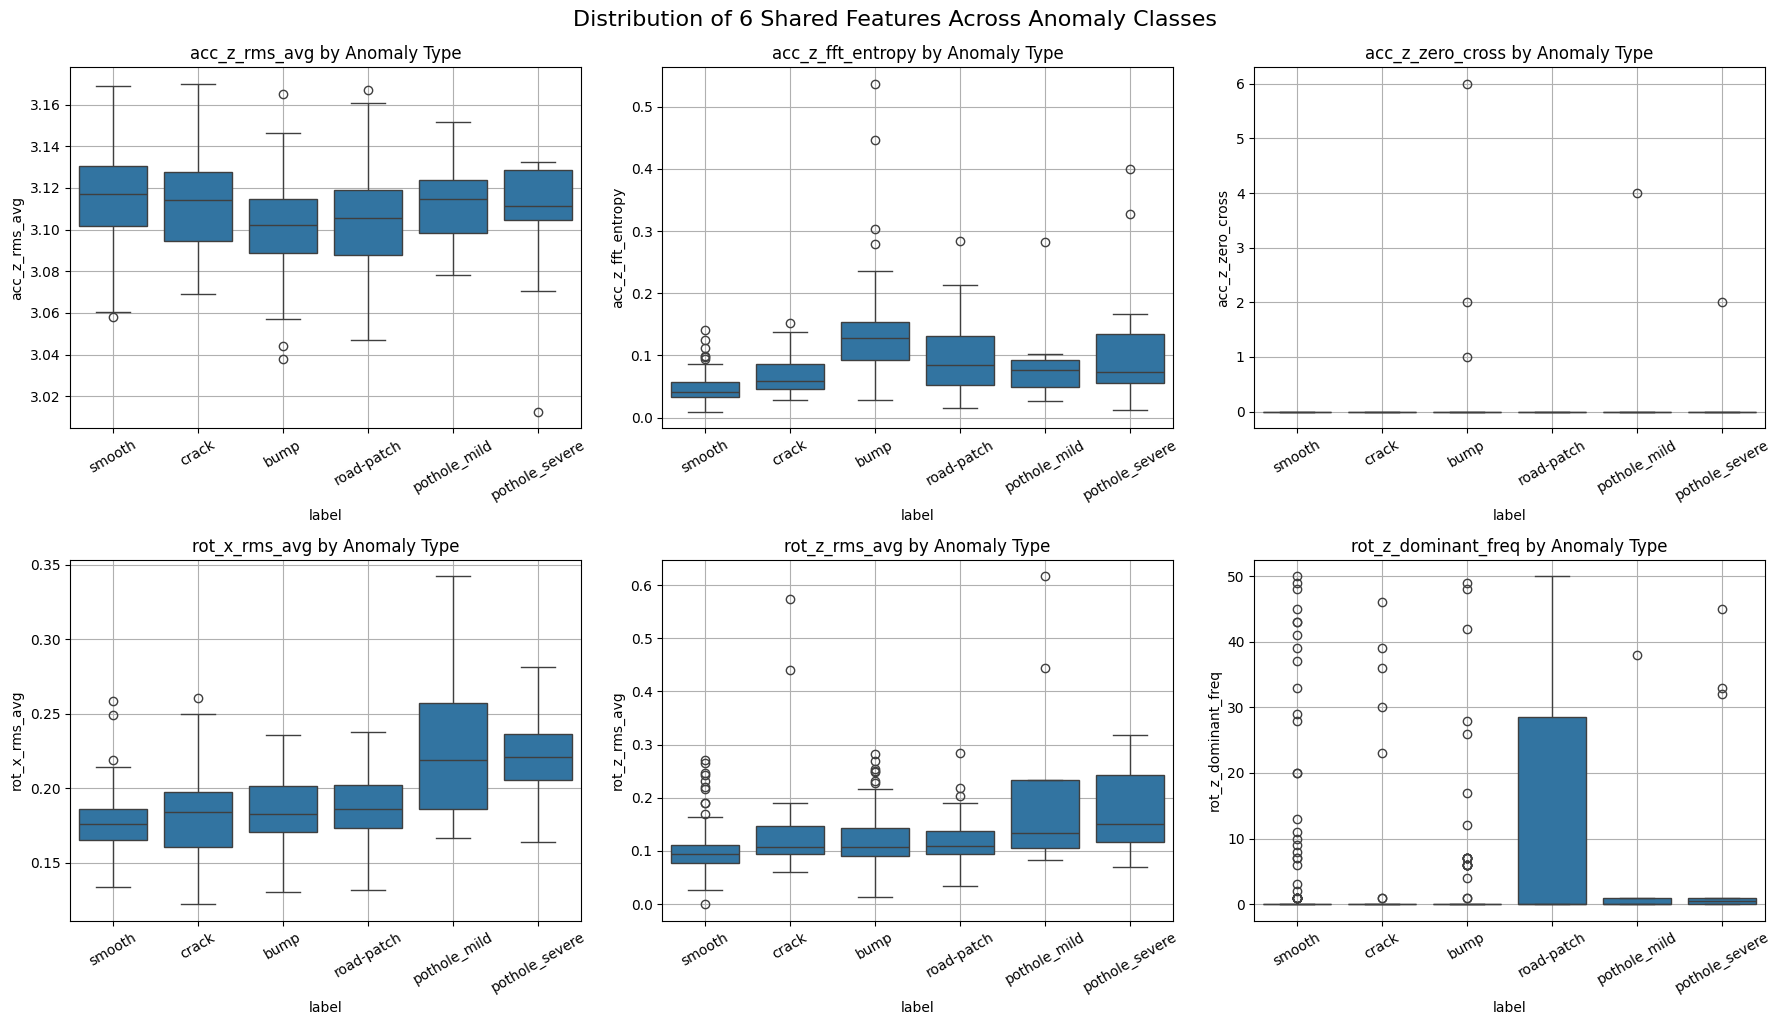

In [132]:
# BY GOD'S GRACE ALONE
#Graciously setting up figure
import seaborn as sns

fig,axes = plt.subplots(2,3,figsize=(18,10))
axes = axes.flatten()

selected_features = [
    "acc_z_rms_avg",
    # "acc_y_rms_avg",
    "acc_z_fft_entropy",
    "acc_z_zero_cross",
    "rot_x_rms_avg",
    "rot_z_rms_avg",
    "rot_z_dominant_freq",
    
]

# Graciously creating boxplot for each feature by label
for idx, feature in enumerate(selected_features):
    sns.boxplot(data=df_full,x="label",y=feature, ax = axes[idx])
    axes[idx].set_title(f'{feature} by Anomaly Type', fontsize = 12)
    axes[idx].tick_params(axis="x", rotation = 30)
    axes[idx].grid(True)


plt.tight_layout()
plt.suptitle("Distribution of 6 Shared Features Across Anomaly Classes", fontsize = 16, y = 1.02 )
plt.show()

In [115]:
# BY GOD'S GRACE ALONE
print("Gracious count of anomaly classes before dropping missing rows,", Counter(df_full["label"]))

Gracious count of anomaly classes before dropping missing rows, Counter({'smooth': 141, 'bump': 94, 'road-patch': 74, 'crack': 29, 'pothole_severe': 20, 'pothole_mild': 8})


In [116]:
# BY GOD'S GRACE ALONE

df_full.dropna(inplace=True)
df_full.shape


(355, 80)

In [117]:
# BY GOD'S GRACE ALONE
print("Gracious count of anomaly classes before dropping missing rows,", Counter(df_full["label"]))

Gracious count of anomaly classes before dropping missing rows, Counter({'smooth': 139, 'bump': 92, 'road-patch': 72, 'crack': 26, 'pothole_severe': 18, 'pothole_mild': 8})


In [118]:
# BY GOD'S GRACE ALONE

X = df_full.drop(columns=["label","batch"])
y = df_full["label"]

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)


In [119]:
# BY GOD'S GRACE ALONE
#Graciously printing the distribution of original training set
print("Original Training Set:", Counter(y_train))

Original Training Set: Counter({'smooth': 104, 'bump': 69, 'road-patch': 54, 'crack': 19, 'pothole_severe': 14, 'pothole_mild': 6})


In [120]:
#BY GOD'S GRACE ALONE
print("Original Test set(It is wrong to look into the test set, yet...)", Counter(y_test))

Original Test set(It is wrong to look into the test set, yet...) Counter({'smooth': 35, 'bump': 23, 'road-patch': 18, 'crack': 7, 'pothole_severe': 4, 'pothole_mild': 2})


In [104]:
# BY GOD'S GRACE ALONE
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)


In [121]:
# BY GOD'S  GRACE ALONE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [122]:
3 # BY GOD'S GRACE ALONE
print("Graciously resampled training set:", Counter(y_train_resampled))

Graciously resampled training set: Counter({'smooth': 104, 'crack': 104, 'road-patch': 104, 'bump': 104, 'pothole_severe': 104, 'pothole_mild': 104})


In [125]:
# BY GOD'S GRACE 
model = RandomForestClassifier(n_estimators=700, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

          bump       0.85      0.96      0.90        23
         crack       0.33      0.14      0.20         7
  pothole_mild       0.00      0.00      0.00         2
pothole_severe       1.00      0.25      0.40         4
    road-patch       0.56      0.56      0.56        18
        smooth       0.80      0.91      0.85        35

      accuracy                           0.74        89
     macro avg       0.59      0.47      0.48        89
  weighted avg       0.72      0.74      0.71        89



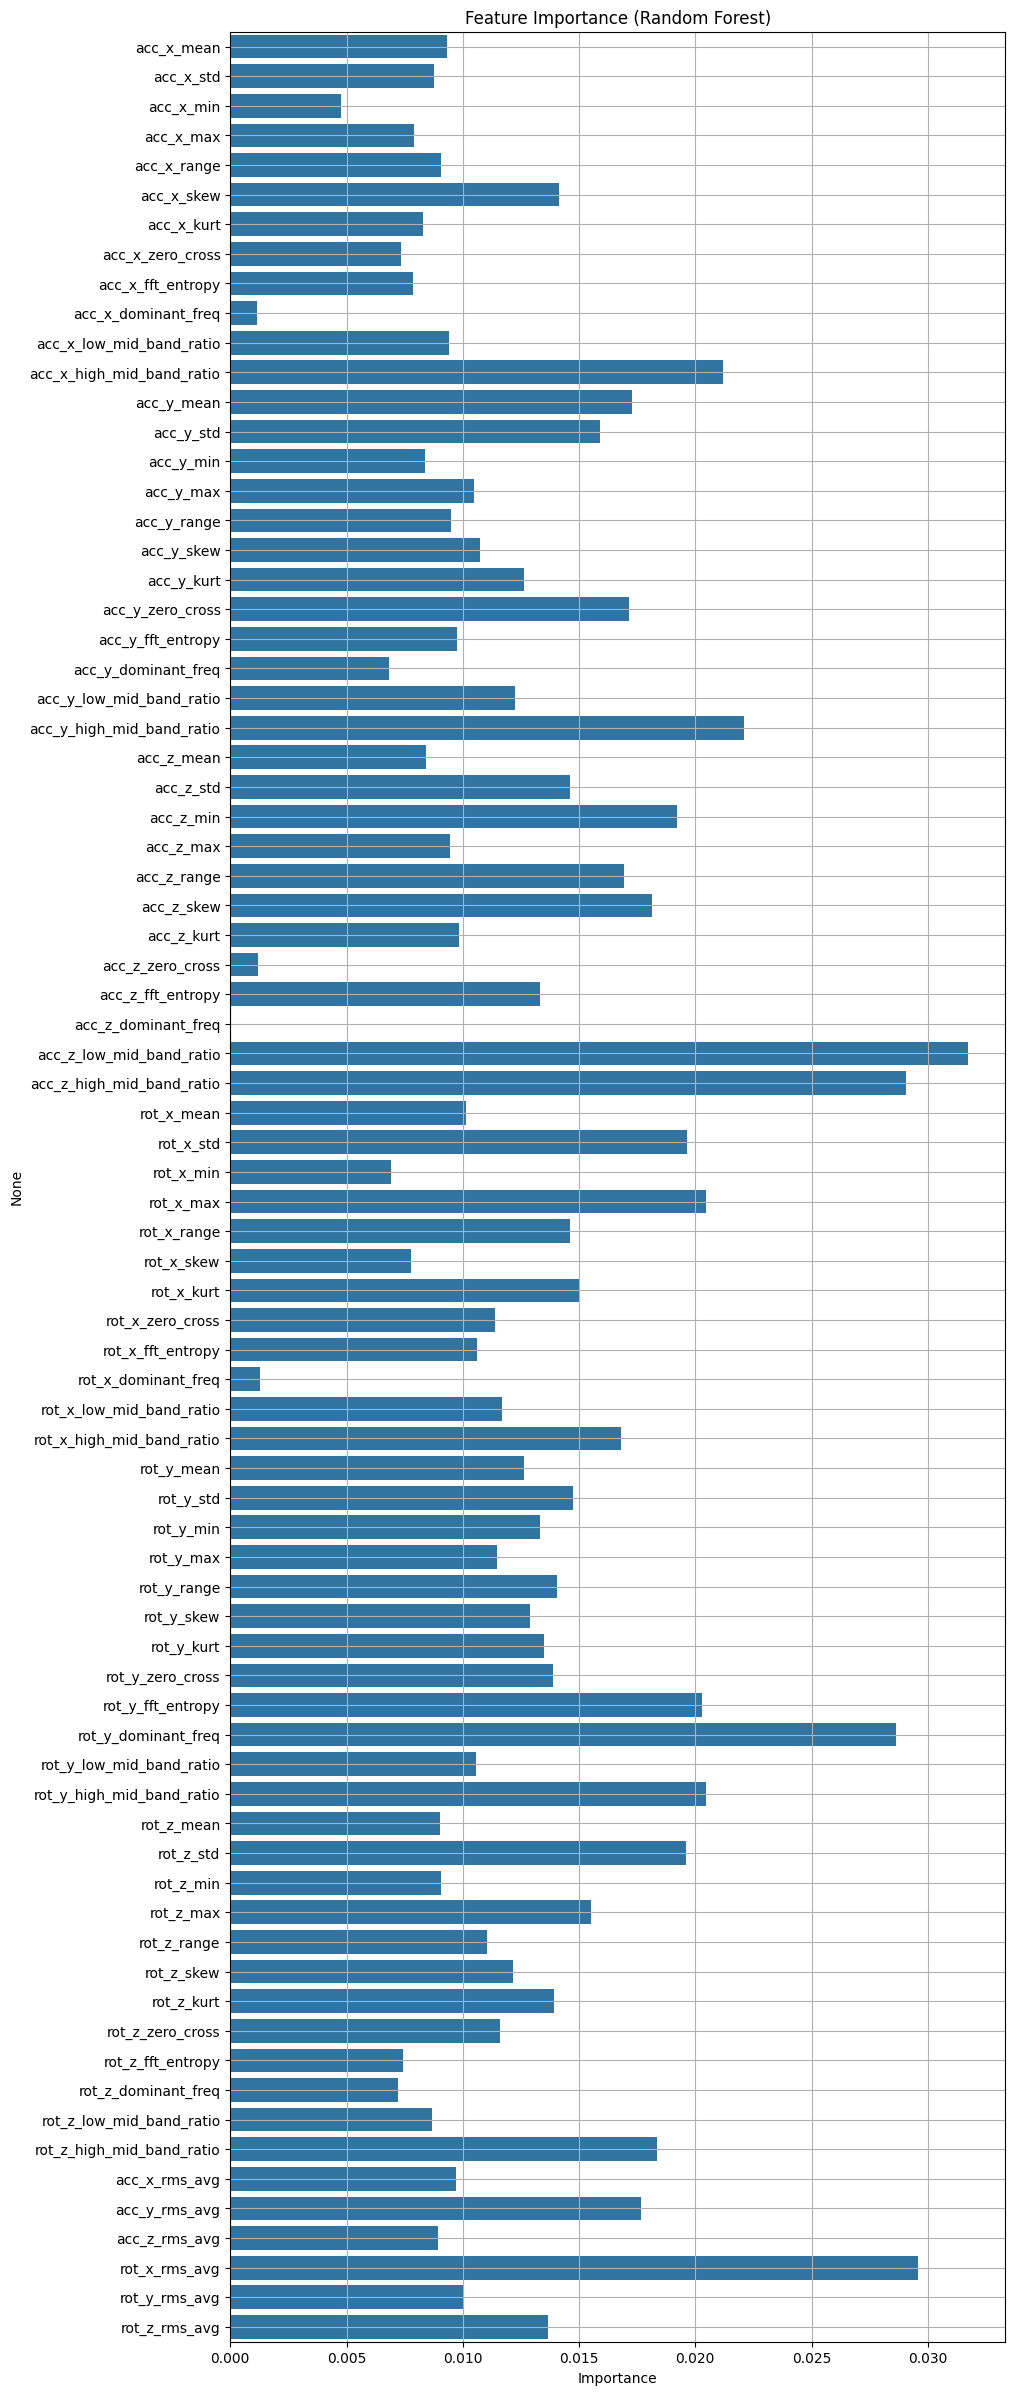

In [135]:
# BY GOD'S GRACE ALONE
# Graciously visualizing which features are most important

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,30))
sns.barplot(x=importances,y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.grid(True)
plt.show()

In [ ]:
# BY GOD'S GRACE ALONE
from scipy.fft import rfft, rfftfreq
for idx,batch in df_smooth_reorganized.groupby("batch")[:20]:
    print(f"Gracious Batch {batch}'s Fourier Transforms:" ,np.abs(rfft(batch["acc_x"])))
    print(f"Gracious Batch {batch}'s Frequency Components:" ,np.abs(rfftfreq(batch["acc_x"])))



In [ ]:
import numpy as np
import pandas as pd
from ahrs.filters import Madgwick
from scipy.spatial.transform import Rotation as R

# Example: assume `df` has columns: ['acc_x_corrected',..., 'rot_x_corrected',...]
## Ensure original acceleration and rotation readings are pseudo-aligned with the global frame 

# === 2. Extract raw values ===
accel = df[['acc_x_corrected', 'acc_y_corrected', 'acc_z_corrected']].to_numpy()
gyro = df[['rot_x_corrected', 'rot_y_corrected', 'rot_z_corrected']].to_numpy()
sample_period = 1/40  # 40 Hz

# === 3. Estimate orientation using Madgwick filter ===
madgwick = Madgwick(sampleperiod=sample_period)
quaternions = np.zeros((len(df), 4))
q = np.array([1.0, 0.0, 0.0, 0.0])

for i in range(len(df)):
    q = madgwick.updateIMU(q, gyr=gyro[i], acc=accel[i])
    quaternions[i] = q

# === 4. Rotate sensor-frame acceleration into global frame ===
accel_global = np.zeros_like(accel)
for i in range(len(df)):
    q = quaternions[i]
    rotation = R.from_quat([q[1], q[2], q[3], q[0]])  # scipy expects [x, y, z, w]
    accel_global[i] = rotation.apply(accel[i])

# === 5. Combine into DataFrame and export ===
df_global = pd.DataFrame(accel_global, columns=['acc_x_global', 'acc_y_global', 'acc_z_global'])
df_combined = pd.concat([df, df_global], axis=1)

# Save to CSV
df_combined.to_csv("imu_with_global_accel.csv", index=False)
print("Saved processed IMU data with global acceleration as 'imu_with_global_accel.csv'")
df_combined.head()


Saved processed IMU data with global acceleration as 'imu_with_global_accel.csv'


,batch,GPS_calc_speed,timestamp,latitude,longitude,accuracy,date_time,anomaly,speed_level,acc_x_corrected,acc_y_corrected,acc_z_corrected,rot_x_corrected,rot_y_corrected,rot_z_corrected,ax_global,ay_global,az_global
0,1,0.0,24,0.0,0.0,2.94,07/06/2025 15:12:50:3.117733,smooth,AVERAGE,0.50,0.36,10.57,-0.01,0.03,-0.02,0.497581,0.356881,10.570220
1,1,0.0,48,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE,0.34,1.59,12.11,-0.12,0.06,-0.02,0.343389,1.593117,12.109495
2,1,0.0,72,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE,-0.46,1.58,9.57,-0.07,-0.01,0.01,-0.456552,1.583340,9.569613
3,1,0.0,96,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE,0.96,1.87,10.04,0.01,0.04,0.01,0.964479,1.866270,10.040265
4,1,0.0,120,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE,0.09,2.37,8.40,0.03,0.03,0.01,0.095972,2.358969,8.403038
